# AI0
## This is the project No.0 and it's introduction to know about pandas, numpy, etc.

### Description:
It helps to fill empty cells in a dataset using pandas, numpy and matplotlib. The deposit_term_bank.csv file is located next to the project form; It is used to predict whether a customer will subscribe to a long-term deposit campaign in a banking institution. In each row of this file there is a record of a user that shows some information like customer age, average annual account balance of the customer, number of customer contacts made during the campaign, the number of days that have passed since the last contact with the customer from the previous campaign, the result of the previous marketing campaign for the customer, has the customer registered a time deposit or not?(Target column), etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

## Q1

### read_csv
read csv file and save into a DataFrame

In [2]:
df = pd.read_csv('bank_term_deposit.csv')
df = pd.DataFrame(df)
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no


### describe
This method Show some information about headers like age, etc those are integer form. For example max, mean, count, etc.

In [3]:
df.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


### tail
This method is used to get the last n rows. n equals 5 by default

In [4]:
df.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


### head
This method is used to return top n. n equals 5 by default.

In [5]:
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


### info
This method prints information about a DataFrame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


## Q2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


In [8]:
df['marital'] = df['marital'].astype('category').cat.codes
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,1,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,1,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,2,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,1,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,1,secondary,NaN,yes,no,226.0,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,1,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,1,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,1,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,1,secondary,1137.0,no,no,129.0,4,211,other,no


## Q3

### Advantages:
Mean and Standard deviation will not change for another processing- Doesn't affect on another datas
### Disadvantages:
If number of NaN is too much in a dataset, it will increase errors in result.

Number of NaN of every columns before replace them by column's mean:

In [9]:
df.isna().sum()

age          537
job            0
marital        0
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

Replace NaN by column's mean:

In [10]:
df.fillna(df.mean(numeric_only=True, axis=0), inplace=True)
# Also sub2['column name'].fillna((sub2['column name'].mean()), inplace=True)
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,1,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,1,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,2,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,1,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,1,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,1,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,1,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,1,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,1,secondary,1137.00000,no,no,129.00000,4,211,other,no


In [11]:
df.isna().sum()

age            0
job            0
marital        0
education      0
balance        0
housing      219
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

Separate y with value NaN from df:

In [12]:
new_df = df[df['y'].isna()]
new_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,1,tertiary,1235.0,no,no,354.00000,3,-1,unknown,NaN
38,33.00000,management,1,secondary,3935.0,yes,no,765.00000,1,342,failure,NaN
54,41.61747,blue-collar,1,secondary,2231.0,yes,no,272.00000,3,-1,unknown,NaN
65,51.00000,blue-collar,0,secondary,23.0,yes,no,134.00000,1,170,failure,NaN
89,41.61747,blue-collar,1,secondary,1831.0,yes,no,203.00000,2,-1,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,2,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,NaN
4471,59.00000,management,1,unknown,3534.0,no,no,216.00000,4,-1,unknown,NaN
4473,33.00000,technician,1,secondary,479.0,yes,no,137.00000,1,272,failure,NaN
4477,32.00000,management,2,tertiary,577.0,no,no,101.00000,2,-1,unknown,NaN


### concat
pd.concat adds the two DataFrames together by appending. if there is any overlap, it will be captured by the drop_duplicates method. However, drop_duplicates by default leaves the first observation and removes every other observation. In this case, we want every duplicate removed.

In [13]:
df = pd.concat([df, new_df, new_df]).drop_duplicates(keep=False)
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,1,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,1,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,2,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,1,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,1,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,1,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,1,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,1,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,1,secondary,1137.00000,no,no,129.00000,4,211,other,no


Number of NaN of every columns after replace them by column's mean:

In [14]:
df.isna().sum()

age            0
job            0
marital        0
education      0
balance        0
housing      201
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y              0
dtype: int64

## Q4

In [15]:
loanNum = df['housing'] == 'yes'
print('Users have home loan = ' + str(loanNum.value_counts()[True]))
print("Users DON'T have home loan = " + str(loanNum.value_counts()[False]))

Users have home loan = 2188
Users DON'T have home loan = 1899


In [16]:
depositNum = df['y'] == 'yes'
print('Users have term deposit = ' + str(depositNum.value_counts()[True]))
print("Users DON'T have term deposit = " + str(depositNum.value_counts()[False]))

Users have term deposit = 464
Users DON'T have term deposit = 3623


## Q5

In [17]:
cond1 = df['age'] > 35
cond2 = df['marital'] == 2
cond3 = df['poutcome'] == 'success'
requestedUsers = df[cond1 & cond2 & cond3]
len(requestedUsers)

14

## Q6

In [18]:
df.loc[df['education']== 'secondary']['balance']

1       4789.00000
4       1136.75024
7        147.00000
10      9374.00000
11       264.00000
           ...    
4514     125.00000
4515     473.00000
4516    -333.00000
4518     295.00000
4519    1137.00000
Name: balance, Length: 2081, dtype: float64

## Q7

### Time using pandas

In [19]:
import timeit
startTime = timeit.default_timer()
print(len(df.loc[df['education']== 'secondary']['balance']))
endTime = timeit.default_timer()
print("Time with pandas = " + str(endTime - startTime)) 

2081
Time with pandas = 0.0027879999979631975


### time using for loops

In [20]:
count = 0
startTime = timeit.default_timer()
for i, j in df.iterrows():
    if j.loc['education']== 'secondary':
        count += 1
print(count)        
endTime = timeit.default_timer()        
print("Time with for loop = " + str(endTime - startTime)) 

2081
Time with for loop = 0.7100616000025184


## Q8

[[<AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'balance'}>]]
[[<AxesSubplot:title={'center':'duration'}>
  <AxesSubplot:title={'center':'campaign'}>]]
[[<AxesSubplot:title={'center':'pdays'}>
  <AxesSubplot:title={'center':'marital'}>]]


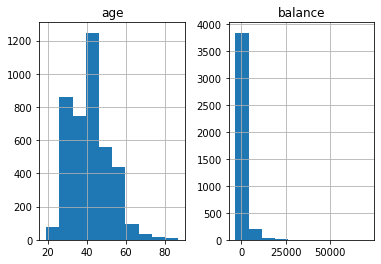

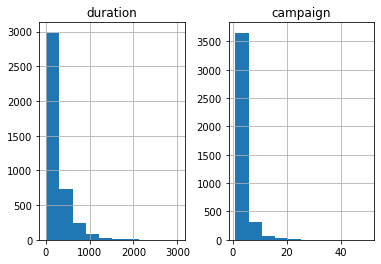

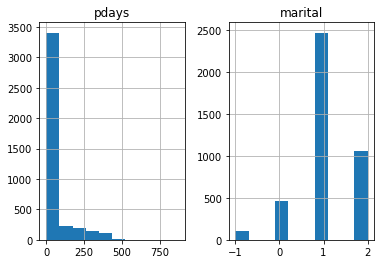

In [21]:
print(df.hist(column=['age', 'balance']))
print(df.hist(column=['duration', 'campaign']))
print(df.hist(column=['pdays', 'marital']))

## Q9

### Normalization

In [22]:
normalized_df = df.copy()
normalized_df[['age', 'balance', 'duration', 'campaign', 'pdays']] = (df[['age', 'balance', 'duration', 'campaign', 'pdays']]-df[['age', 'balance', 'duration', 'campaign', 'pdays']].mean())/df[['age', 'balance', 'duration', 'campaign', 'pdays']].std()
normalized_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,-1.154366,unemployed,1,primary,0.255388,no,no,-0.724620,-0.573012,-0.404051,unknown,no
1,-0.856422,services,1,secondary,1.406374,yes,yes,-0.005131,-0.573012,3.031432,failure,no
2,-0.000582,management,2,tertiary,-0.378000,yes,no,-0.313979,-0.573012,2.940492,failure,no
3,-1.154366,management,1,tertiary,0.136148,yes,yes,-0.259744,0.380660,-0.404051,unknown,no
4,1.725758,blue-collar,1,secondary,0.006078,yes,no,-0.155147,-0.573012,-0.404051,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.856422,services,1,secondary,-0.557434,yes,no,0.243872,0.698550,-0.404051,unknown,no
4517,1.527129,self-employed,1,tertiary,-1.699986,yes,yes,-0.437946,-0.573012,-0.404051,unknown,no
4518,1.527129,technician,1,secondary,-0.316655,no,no,-0.445694,2.605894,-0.404051,unknown,no
4519,-1.352996,blue-collar,1,secondary,0.006173,no,no,-0.530922,0.380660,1.738074,other,no


## Q10

Save std and mean of y-with-no-value columns in a new DataFrame with name ser1

#### Unnormalized Data

In [23]:
unnormalized_df_without_y = df[df['y'] == 'no']
myList1 = [[unnormalized_df_without_y['age'].mean(), unnormalized_df_without_y['age'].std()],
         [unnormalized_df_without_y['balance'].mean(), unnormalized_df_without_y['balance'].std()],
         [unnormalized_df_without_y['campaign'].mean(), unnormalized_df_without_y['campaign'].std()],
         [unnormalized_df_without_y['duration'].mean(), unnormalized_df_without_y['duration'].std()],
         [unnormalized_df_without_y['pdays'].mean(), unnormalized_df_without_y['pdays'].std()]]
unnormalized_ser1 = pd.DataFrame(myList1, index=['age','balance','campaign','duration','pdays'], columns=['mean', 'std'])
unnormalized_ser1

,mean,std
age,41.459422,9.705880
balance,1112.427773,2668.646159
campaign,2.873309,3.251846
duration,229.944051,212.391551
pdays,35.545680,95.614950


#### Normalized Data

In [24]:
df_without_y = normalized_df[normalized_df['y'] == 'no']
myList1 = [[df_without_y['age'].mean(), df_without_y['age'].std()],
         [df_without_y['balance'].mean(), df_without_y['balance'].std()],
         [df_without_y['campaign'].mean(), df_without_y['campaign'].std()],
         [df_without_y['duration'].mean(), df_without_y['duration'].std()],
         [df_without_y['pdays'].mean(), df_without_y['pdays'].std()]]
ser1 = pd.DataFrame(myList1, index=['age','balance','campaign','duration','pdays'], columns=['mean', 'std'])
ser1

,mean,std
age,-0.016278,0.963936
balance,-0.003248,1.023176
campaign,0.022495,1.033731
duration,-0.139868,0.822798
pdays,-0.034780,0.966128


Save std and mean of y-with-yes-value columns in a new DataFrame with name ser2

#### Unnormalized Data

In [25]:
unnormalized_df_with_y = df[df['y'] == 'yes']
myList2 = [[unnormalized_df_with_y['age'].mean(), unnormalized_df_with_y['age'].std()],
         [unnormalized_df_with_y['balance'].mean(), unnormalized_df_with_y['balance'].std()],
         [unnormalized_df_with_y['campaign'].mean(), unnormalized_df_with_y['campaign'].std()],
         [unnormalized_df_with_y['duration'].mean(), unnormalized_df_with_y['duration'].std()],
         [unnormalized_df_with_y['pdays'].mean(), unnormalized_df_with_y['pdays'].std()]]
unnormalized_ser2 = pd.DataFrame(myList2, index=['age','balance','campaign','duration','pdays'], columns=['mean', 'std'])
unnormalized_ser2

,mean,std
age,42.903121,12.487084
balance,1187.037729,2077.763931
campaign,2.250000,2.064301
duration,547.958975,381.182814
pdays,65.864224,118.750937


#### Normalized Data

In [26]:
df_with_y = normalized_df[normalized_df['y'] == 'yes']
myList2 = [[df_with_y['age'].mean(), df_with_y['age'].std()],
         [df_with_y['balance'].mean(), df_with_y['balance'].std()],
         [df_with_y['campaign'].mean(), df_with_y['campaign'].std()],
         [df_with_y['duration'].mean(), df_with_y['duration'].std()],
         [df_with_y['pdays'].mean(), df_with_y['pdays'].std()]]
ser2 = pd.DataFrame(myList2, index=['age','balance','campaign','duration','pdays'], columns=['mean', 'std'])
ser2

,mean,std
age,0.127102,1.240150
balance,0.025358,0.796628
campaign,-0.175649,0.656222
duration,1.092112,1.476690
pdays,0.271569,1.199902


Calculate normalized pdf for every columns(age, balance, campaign, duration and pdays) filtered by y with color:

red -> pdf with y = no

blue -> pdf with y = yes

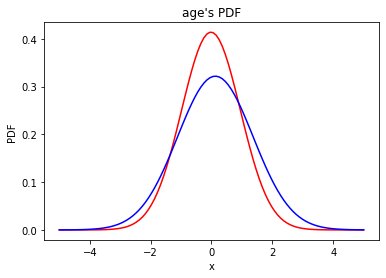

In [27]:
x = np.linspace(-5,5,100)
pdf_without_y = scipy.stats.norm.pdf(x,
                     loc=ser1['mean']['age'],
                     scale=ser1['std']['age'])
pdf_with_y = scipy.stats.norm.pdf(x,
                     loc=ser2['mean']['age'],
                     scale=ser2['std']['age'])
plt.plot(x, pdf_without_y, 'r')
plt.plot(x, pdf_with_y, 'b')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("age's PDF")
plt.show()

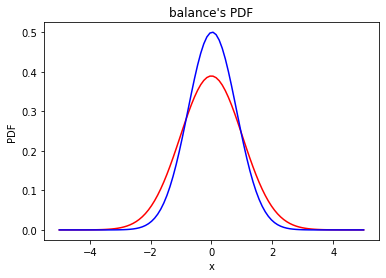

In [28]:
pdf_without_y = scipy.stats.norm.pdf(x,
                     loc=ser1['mean']['balance'],
                     scale=ser1['std']['balance'])
pdf_with_y = scipy.stats.norm.pdf(x,
                     loc=ser2['mean']['balance'],
                     scale=ser2['std']['balance'])
plt.plot(x, pdf_without_y, 'r')
plt.plot(x, pdf_with_y, 'b')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("balance's PDF")
plt.show()

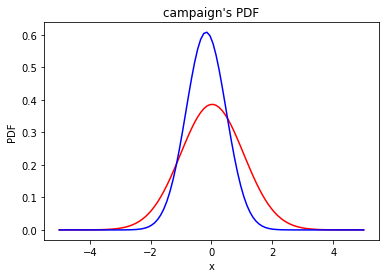

In [29]:
pdf_without_y = scipy.stats.norm.pdf(x,
                     loc=ser1['mean']['campaign'],
                     scale=ser1['std']['campaign'])
pdf_with_y = scipy.stats.norm.pdf(x,
                     loc=ser2['mean']['campaign'],
                     scale=ser2['std']['campaign'])
plt.plot(x, pdf_without_y, 'r')
plt.plot(x, pdf_with_y, 'b')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("campaign's PDF")
plt.show()

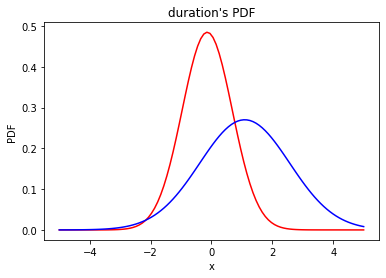

In [30]:
pdf_without_y = scipy.stats.norm.pdf(x,
                     loc=ser1['mean']['duration'],
                     scale=ser1['std']['duration'])
pdf_with_y = scipy.stats.norm.pdf(x,
                     loc=ser2['mean']['duration'],
                     scale=ser2['std']['duration'])
plt.plot(x, pdf_without_y, 'r')
plt.plot(x, pdf_with_y, 'b')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title("duration's PDF")
plt.show()

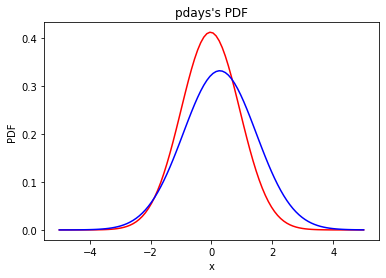

In [31]:
pdf_without_y = scipy.stats.norm.pdf(x,
                     loc=ser1['mean']['pdays'],
                     scale=ser1['std']['pdays'])
pdf_with_y = scipy.stats.norm.pdf(x,
                     loc=ser2['mean']['pdays'],
                     scale=ser2['std']['pdays'])
plt.plot(x, pdf_without_y, 'r')
plt.plot(x, pdf_with_y, 'b')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title("pdays's PDF")
plt.show()

Based on mean and std, by two charts' mean and standard derivation function difference, we choose duration parameter. If mean  difference more than the other and standard derivation function difference less than the other, that parameter is better than the other.

In [32]:
myList =[[abs(ser2['mean']['age'] - ser1['mean']['age']), abs(ser2['std']['age'] - ser1['std']['age'])],
         [abs(ser2['mean']['balance'] - ser1['mean']['balance']), abs(ser2['std']['balance'] - ser1['std']['balance'])],
         [abs(ser2['mean']['campaign'] - ser1['mean']['campaign']), abs(ser2['std']['campaign'] - ser1['std']['campaign'])],
         [abs(ser2['mean']['duration'] - ser1['mean']['duration']), abs(ser2['std']['duration'] - ser1['std']['duration'])],
         [abs(ser2['mean']['pdays'] - ser1['mean']['pdays']), abs(ser2['std']['pdays'] - ser1['std']['pdays'])]]
absSer = pd.DataFrame(myList, index=['age','balance','campaign','duration','pdays'], columns=['abs(mean)', 'abs(std)'])
absSer

,abs(mean),abs(std)
age,0.143380,0.276214
balance,0.028606,0.226548
campaign,0.198144,0.377509
duration,1.231980,0.653892
pdays,0.306349,0.233774


by division std by mean, we can find best numeric parameter:

In [33]:
print(absSer['abs(mean)'] / absSer['abs(std)'])

age         0.519091
balance     0.126269
campaign    0.524872
duration    1.884072
pdays       1.310450
dtype: float64


## Q11

Let's apply the request with new_df that built for df with NaN-valued y:

In [34]:
new_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,1,tertiary,1235.0,no,no,354.00000,3,-1,unknown,NaN
38,33.00000,management,1,secondary,3935.0,yes,no,765.00000,1,342,failure,NaN
54,41.61747,blue-collar,1,secondary,2231.0,yes,no,272.00000,3,-1,unknown,NaN
65,51.00000,blue-collar,0,secondary,23.0,yes,no,134.00000,1,170,failure,NaN
89,41.61747,blue-collar,1,secondary,1831.0,yes,no,203.00000,2,-1,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,2,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,NaN
4471,59.00000,management,1,unknown,3534.0,no,no,216.00000,4,-1,unknown,NaN
4473,33.00000,technician,1,secondary,479.0,yes,no,137.00000,1,272,failure,NaN
4477,32.00000,management,2,tertiary,577.0,no,no,101.00000,2,-1,unknown,NaN


In [35]:
condition_yes = scipy.stats.norm.pdf(((new_df[['duration']]-unnormalized_ser2['mean']['duration'])/unnormalized_ser2['std']['duration']),
                                     loc=ser2['mean']['duration'],
                                    scale=ser2['std']['duration'])
condition_no = scipy.stats.norm.pdf(((new_df[['duration']]-unnormalized_ser1['mean']['duration'])/unnormalized_ser1['std']['duration']),
                                    loc=ser1['mean']['duration'],
                                    scale=ser1['std']['duration'])

cond = pd.DataFrame(data=condition_yes >= condition_no, index=new_df.index, columns='y'.split())
# new_df.loc[cond, 'y'] = 'yes'
# new_df.loc[~cond, 'y'] = 'no'
# new_df['y'] = new_df['y'](lambda x: 'yes' if x==True else 'no')
cond['y'] = cond['y'].apply(lambda x: 'yes' if x == True else 'no')
new_df = new_df.assign(y=cond['y'])
new_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,1,tertiary,1235.0,no,no,354.00000,3,-1,unknown,no
38,33.00000,management,1,secondary,3935.0,yes,no,765.00000,1,342,failure,yes
54,41.61747,blue-collar,1,secondary,2231.0,yes,no,272.00000,3,-1,unknown,no
65,51.00000,blue-collar,0,secondary,23.0,yes,no,134.00000,1,170,failure,no
89,41.61747,blue-collar,1,secondary,1831.0,yes,no,203.00000,2,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,2,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,no
4471,59.00000,management,1,unknown,3534.0,no,no,216.00000,4,-1,unknown,no
4473,33.00000,technician,1,secondary,479.0,yes,no,137.00000,1,272,failure,no
4477,32.00000,management,2,tertiary,577.0,no,no,101.00000,2,-1,unknown,no


In [36]:
new_df.to_csv('result.csv')
new_df.to_html('result.html')